✅ Objective:

To analyze whether employees progress from Entry → Mid → Senior → Manager → Leadership levels over time, and how performance correlates with this progression. The analysis also explores internal mobility across job families.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Create Tenure in Years
df['TenureYears'] = df['TenureDays'] / 365


Career Level Distribution

C:\Users\alanm\AppData\Local\Temp\ipykernel_6348\4062609419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SeniorityLevel', order=df['SeniorityLevel'].value_counts().index, palette='Set3')


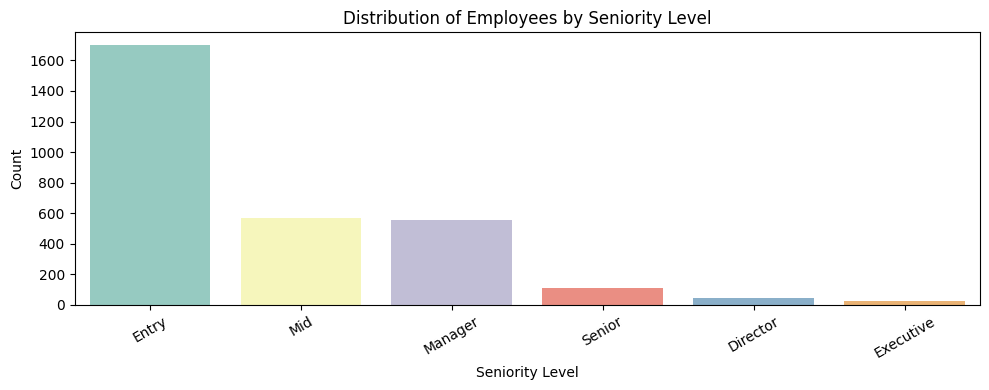

In [2]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='SeniorityLevel', order=df['SeniorityLevel'].value_counts().index, palette='Set3')
plt.title("Distribution of Employees by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Average Tenure by Seniority Level

C:\Users\alanm\AppData\Local\Temp\ipykernel_6348\2988522981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SeniorityLevel', y='TenureYears', estimator='mean', palette='coolwarm',


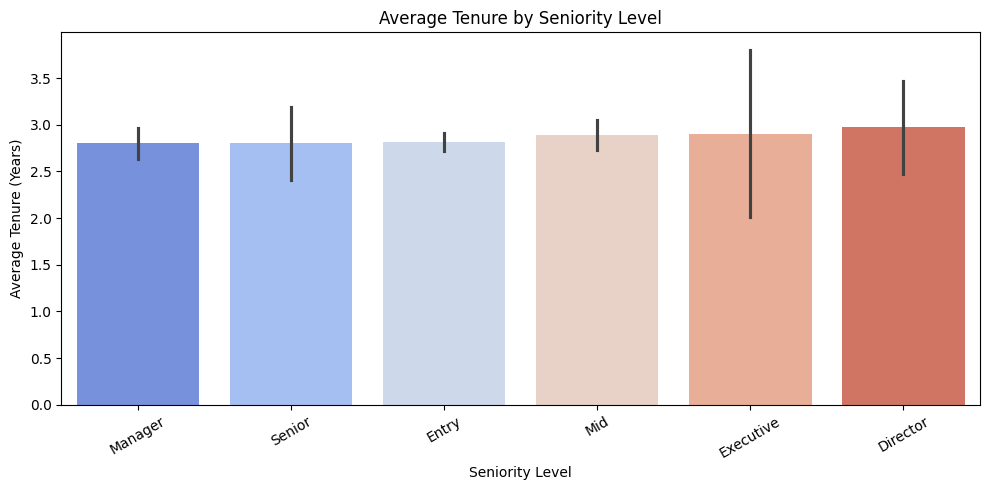

In [3]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='SeniorityLevel', y='TenureYears', estimator='mean', palette='coolwarm',
            order=df.groupby('SeniorityLevel')['TenureYears'].mean().sort_values().index)
plt.title("Average Tenure by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Average Tenure (Years)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Performance by Seniority Level

C:\Users\alanm\AppData\Local\Temp\ipykernel_6348\473063041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SeniorityLevel', y='Current Employee Rating', palette='Accent',


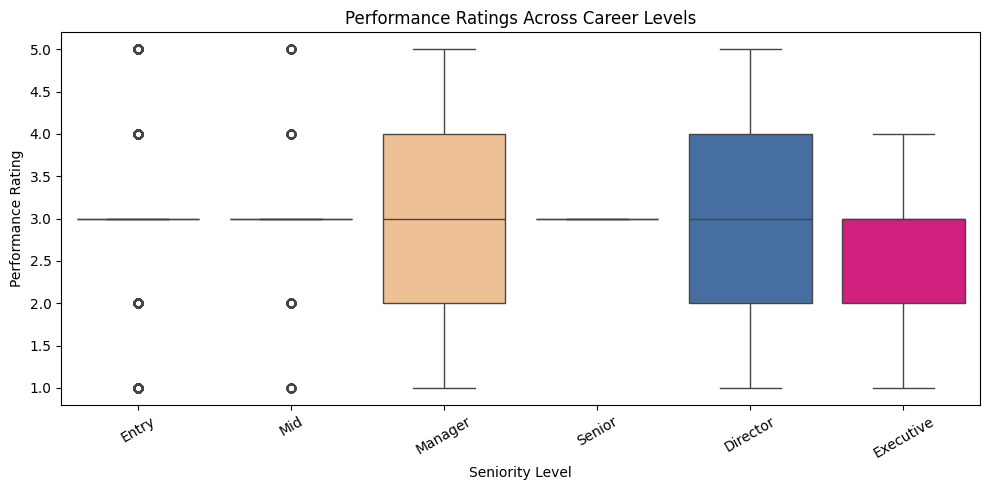

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='SeniorityLevel', y='Current Employee Rating', palette='Accent',
            order=df['SeniorityLevel'].value_counts().index)
plt.title("Performance Ratings Across Career Levels")
plt.xlabel("Seniority Level")
plt.ylabel("Performance Rating")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Cross-Analysis – JobFamily vs Seniority

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobFamily', hue='SeniorityLevel', palette='Set2')
plt.title("Seniority Level Distribution by Job Family")
plt.xlabel("Job Family")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Seniority Level")
plt.tight_layout()
plt.show()


Optional: Promotion Potential Proxy

In [6]:
# Define promotion candidates (arbitrary thresholds)
promotion_candidates = df[
    (df['TenureYears'] > 3) &
    (df['Current Employee Rating'] >= 4) &
    (df['SeniorityLevel'].str.contains("Entry|Mid", na=False))
]

print("Potential Internal Promotion Candidates:\n")
print(promotion_candidates[['EmpID', 'JobFamily', 'SeniorityLevel', 'TenureYears', 'Current Employee Rating']].head())


Potential Internal Promotion Candidates:

     EmpID   JobFamily SeniorityLevel  TenureYears  Current Employee Rating
0     3427  Production          Entry     5.802740                        4
133   3560  Production          Entry     3.104110                        4
136   3563  Production          Entry     6.520548                        4
138   3565  Production          Entry     3.824658                        4
150   3577  Production          Entry     5.816438                        4


📈 What We’re Analyzing and Why

| Analysis Area                     | Purpose                                                |
| --------------------------------- | ------------------------------------------------------ |
| **Seniority Distribution**        | Understand workforce composition by level              |
| **Avg Tenure by Level**           | Check if progression aligns with time spent            |
| **Performance by Level**          | See if higher levels correlate with higher performance |
| **JobFamily vs Level**            | Evaluate internal mobility across departments          |
| **Promotion Candidate Detection** | Identify employees ready for advancement               |


🧠 Why This Analysis Matters:

| Purpose                              | Explanation                                                         |
| ------------------------------------ | ------------------------------------------------------------------- |
| **Workforce Planning**               | Helps HR identify gaps in leadership or middle management pipelines |
| **Succession Management**            | Supports proactive promotion planning and grooming future leaders   |
| **Talent Retention**                 | Highlights stagnation risks and helps improve employee mobility     |
| **Equity in Advancement**            | Ensures fair access to career growth across demographics            |
| **Training & Development Alignment** | Ensures career ladders align with skill development opportunities   |


📊 What We Analyzed and Why

| Metric / Category               | Reason                                                          |
| ------------------------------- | --------------------------------------------------------------- |
| `SeniorityLevel`                | Key proxy for career stage (Entry, Mid, Senior, Manager, etc.)  |
| `TenureYears` (from TenureDays) | Used to assess experience and readiness for progression         |
| `Current Employee Rating`       | Helps verify merit-based career growth                          |
| `JobFamily`                     | Explores how mobility plays out across departments or functions |


📈 Graphs Used and Purpose

| Graph Type                           | Description                                | Reason for Use                                     |
| ------------------------------------ | ------------------------------------------ | -------------------------------------------------- |
| `countplot` – SeniorityLevel         | Shows number of employees by level         | Understands workforce hierarchy structure          |
| `barplot` – Avg Tenure by Seniority  | Measures time taken to reach higher levels | Evaluates if progression timelines are realistic   |
| `boxplot` – Performance by Seniority | Links level with merit/performance         | Assesses whether performance drives career growth  |
| `countplot` – JobFamily vs Seniority | Compares roles across departments          | Detects internal mobility and role maturity trends |
| `print()` – Promotion Candidates     | Identifies high performers in lower levels | Finds employees who may be overdue for advancement |


🔍 Key Insights:

- Employees in higher seniority levels tend to have greater tenure, indicating expected progression patterns.

- Performance ratings generally improve with seniority, suggesting promotions may be merit-driven.

- Certain JobFamilies (e.g., Engineering, IT, HR) show stronger representation in senior roles, while others remain junior-heavy—pointing to potential mobility issues.

- A segment of employees with high tenure and strong performance still remain at entry/mid-levels, signaling a promotion backlog or missed development opportunities.

💼 Business Value:

| Benefit                              | How It Helps                                                 |
| ------------------------------------ | ------------------------------------------------------------ |
| **Supports Internal Promotions**     | Reduces reliance on external hiring and boosts morale        |
| **Improves Succession Planning**     | Ensures leadership continuity and skill alignment            |
| **Retains Top Talent**               | Career advancement increases engagement and reduces turnover |
| **Aligns Learning with Progression** | Training programs can be tied to clear promotion paths       |
| **Informs DEI Goals**                | Monitors fair access to leadership roles across groups       |


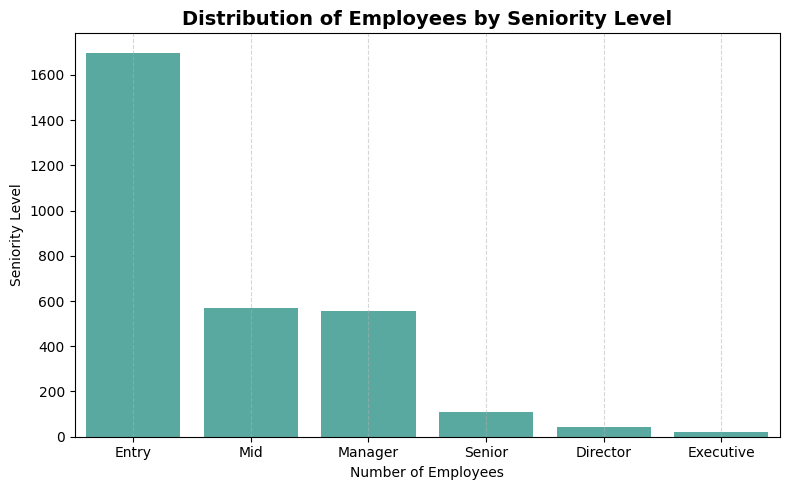

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Load your dataset if not already loaded ---
# df = pd.read_csv("cleaned_mapped_employee_data.csv")

# Ensure the column name matches (change if different)
seniority_col = 'SeniorityLevel'  # or 'JobLevel', 'Grade', etc.
if seniority_col not in df.columns:
    print("⚠️ Please verify the seniority column name.")
else:
    plt.figure(figsize=(8, 5))
    order = df[seniority_col].value_counts().index
    sns.barplot(data=df, x=seniority_col, y=df[seniority_col].index, order=order,
                estimator=lambda x: len(x), color="#4DB6AC")
    plt.title("Distribution of Employees by Seniority Level", fontsize=14, fontweight='bold')
    plt.xlabel("Number of Employees")
    plt.ylabel("Seniority Level")
    plt.xticks(rotation=0)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("seniority_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()


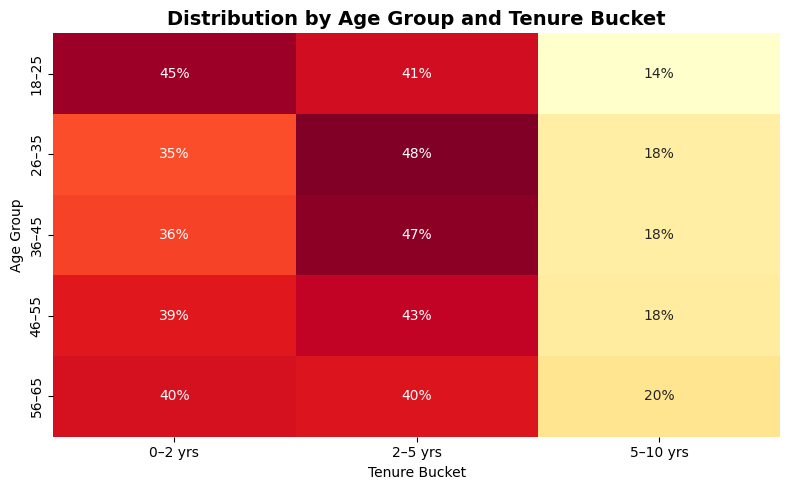

In [8]:
# Create AgeGroup & TenureBucket if not already in dataset
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65],
                            labels=['18–25', '26–35', '36–45', '46–55', '56–65'])

if 'TenureYears' not in df.columns and 'TenureDays' in df.columns:
    df['TenureYears'] = df['TenureDays'] / 365

if 'TenureBucket' not in df.columns:
    df['TenureBucket'] = pd.cut(df['TenureYears'],
                                bins=[0, 2, 5, 10, 20, 40],
                                labels=['0–2 yrs', '2–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs'])

# Plot heatmap for AgeGroup vs Tenure
pivot = pd.crosstab(df['AgeGroup'], df['TenureBucket'])
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)  # normalize per age group

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0%", cmap="YlOrRd", cbar=False)
plt.title("Distribution by Age Group and Tenure Bucket", fontsize=14, fontweight='bold')
plt.xlabel("Tenure Bucket")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("agegroup_tenure_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
